In [35]:
!pip3 install pycaret

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [69]:
dataset = pd.read_csv('loan_approval_dataset.csv')
dataset

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


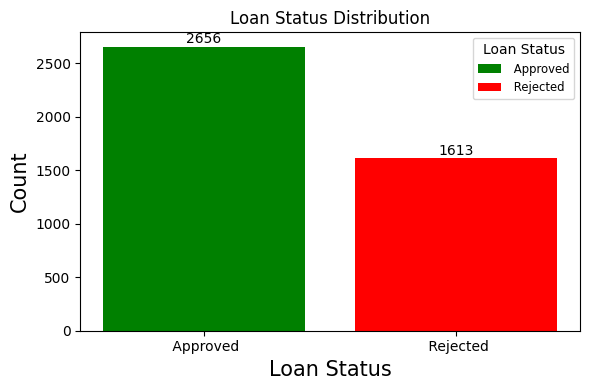

In [71]:
loan_status_counts = dataset[' loan_status'].value_counts()
plt.figure(figsize=(6, 4))
bars = plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'red'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(bars, loan_status_counts.index, title='Loan Status', loc='upper right', fontsize='small') 
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

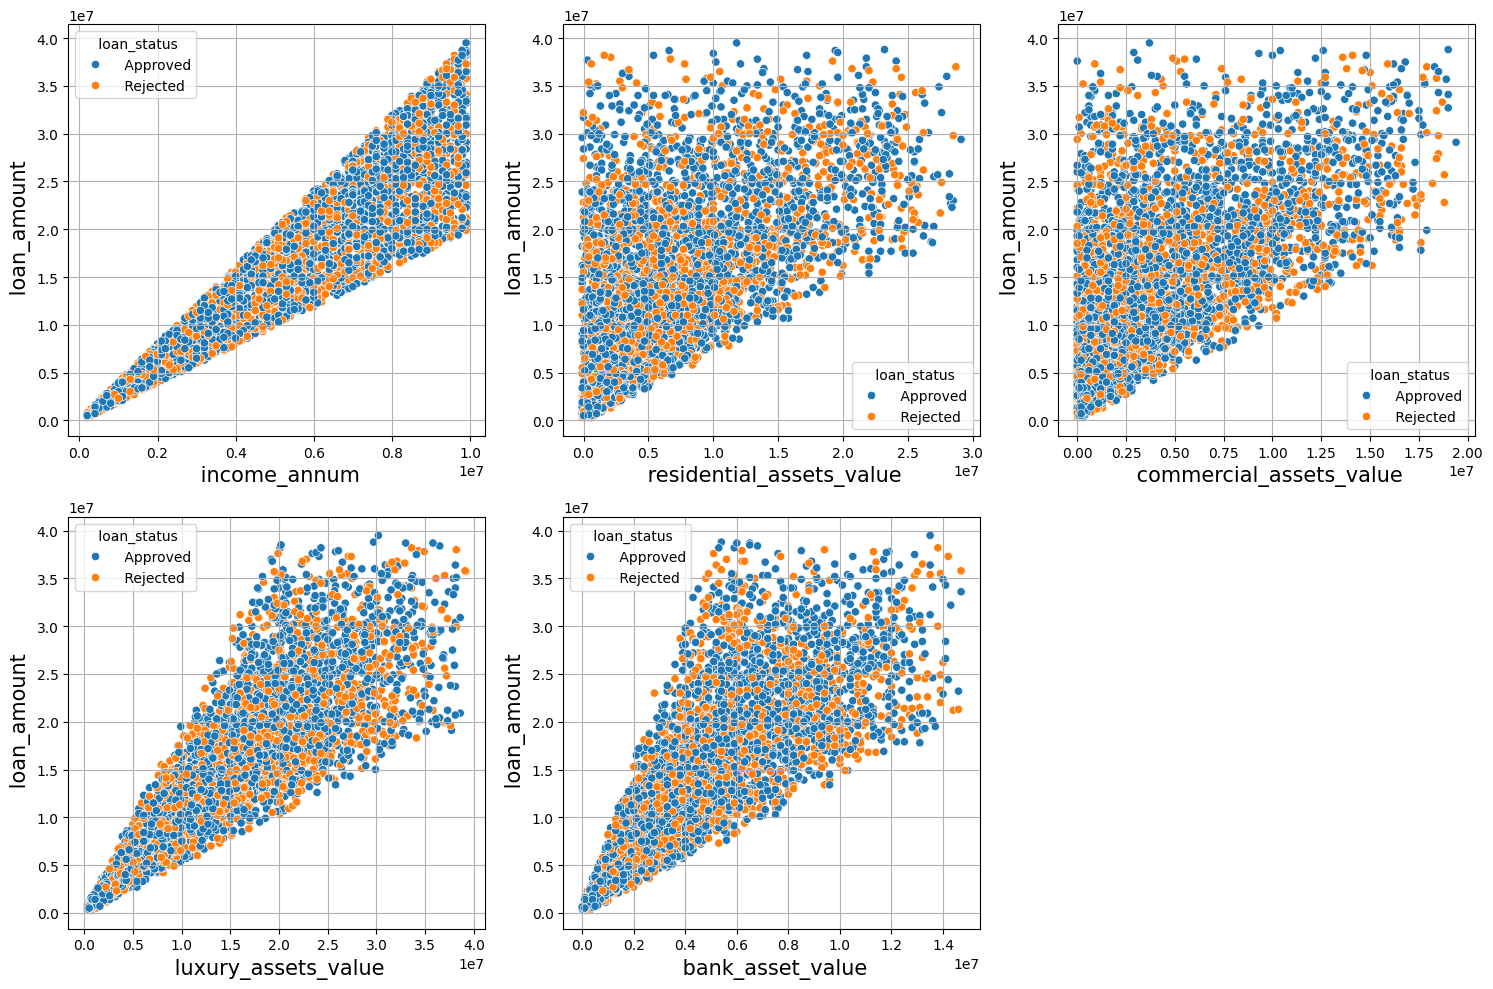

In [72]:
depend = [' income_annum',' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']

plt.figure(figsize=(15, 10))

r=2
c=3
it=1
for i in depend:
    plt.subplot(r,c,it)
    sns.scatterplot(x=i,y=' loan_amount',data=dataset,hue=' loan_status')
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

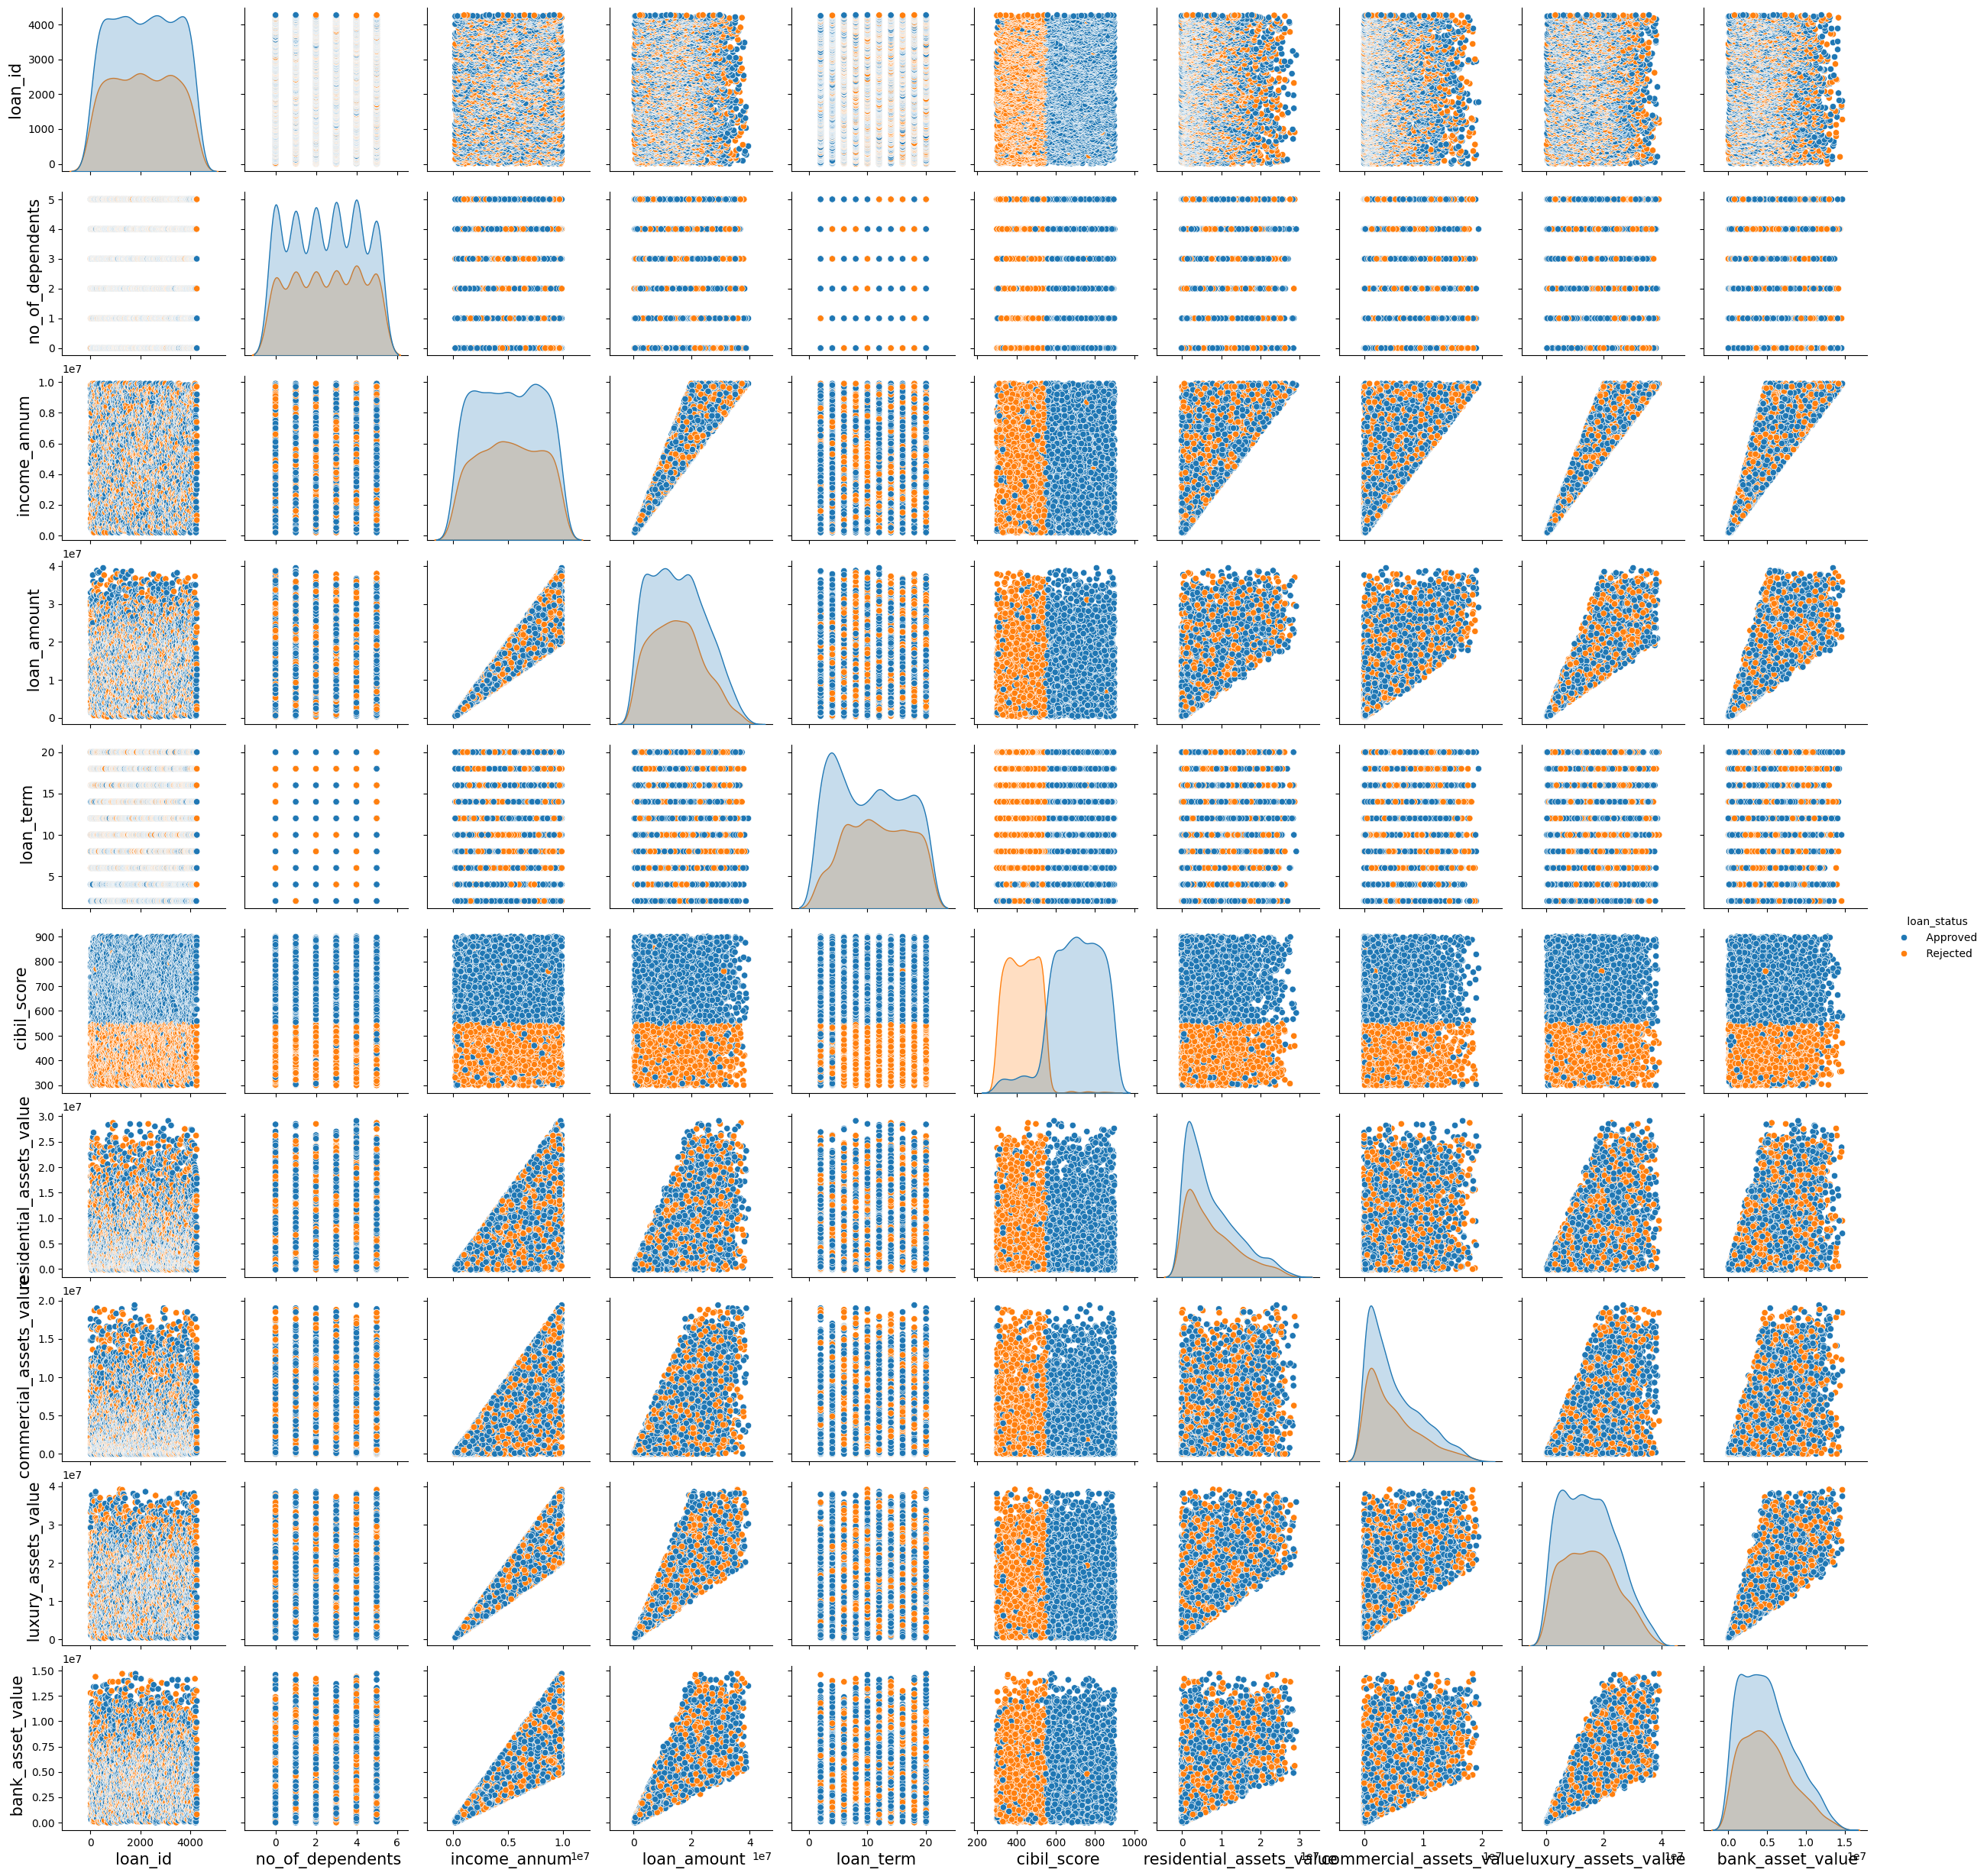

In [74]:
sns.set_context(rc = {'axes.labelsize':15})
sns.pairplot(data = dataset, hue = ' loan_status')
plt.show()

In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset = dataset.drop('loan_id', axis = 1) 

dataset[' self_employed'] = le.fit_transform(dataset[' self_employed'])
dataset[' loan_status'] = le.fit_transform(dataset[' loan_status'])
dataset[' education'] = le.fit_transform(dataset[' education'])

dataset

no_of_dependents   education   self_employed   income_annum  \
0                     2           0               0        9600000   
1                     0           1               1        4100000   
2                     3           0               0        9100000   
3                     3           0               0        8200000   
4                     5           1               1        9800000   
...                 ...         ...             ...            ...   
4264                  5           0               1        1000000   
4265                  0           1               1        3300000   
4266                  2           1               0        6500000   
4267                  1           1               0        4100000   
4268                  1           0               0        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

       loan_status  
0                0  
1                1  
2                1  
3                1  
4                1  
...            ...  
4264             1  
4265             0  
4266             1  
4267             0  
4268             0  

[4269 rows x 12 columns]

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


X = dataset
calc_vif(X)

#""" VIF starts at 1 and has no upper limit
#VIF = 1, no correlation between the independent variable and the other variables
#VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others """

variables        VIF
0            no_of_dependents   3.048003
1                   education   1.962193
2               self_employed   1.975802
3                income_annum  75.549918
4                 loan_amount  27.404609
5                   loan_term   4.750344
6                 cibil_score   7.970685
7    residential_assets_value   3.910599
8     commercial_assets_value   3.883780
9         luxury_assets_value  27.543440
10           bank_asset_value  12.161266
11                loan_status   1.980462

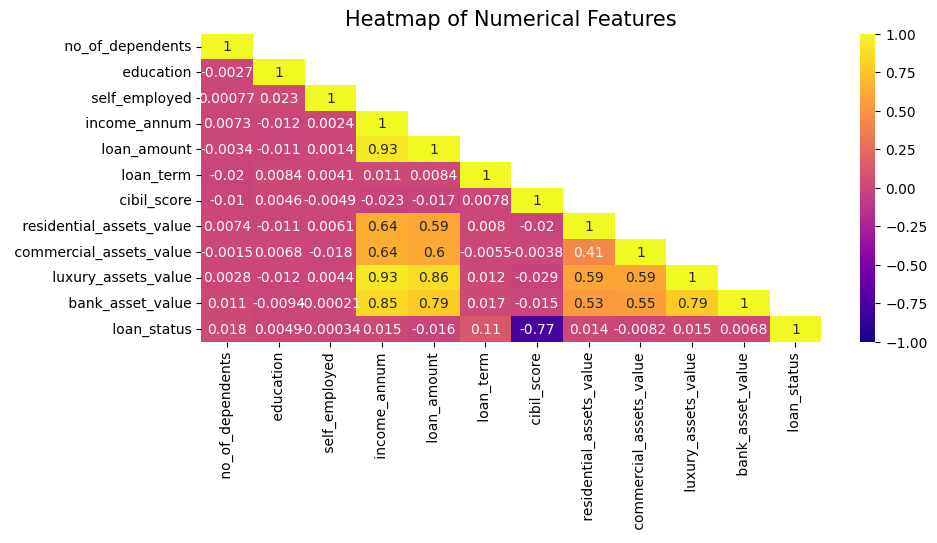

In [108]:
cor = dataset.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=1, cmap='plasma')
plt.title("Heatmap of Numerical Features", fontsize=15)
plt.show()

In [82]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1] 
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [83]:
from sklearn.decomposition import PCA

pca = PCA() # keep 95% of the information no matter feature size

X_pca = pca.fit_transform(X)

X_pca.shape

(4269, 11)

[7.94975595e-01 9.65455470e-02 4.79291027e-02 4.50238731e-02
 1.37994812e-02 1.72640048e-03 1.21360932e-10 1.33130395e-13
 1.17364510e-14 1.04559124e-15 9.97019139e-16]


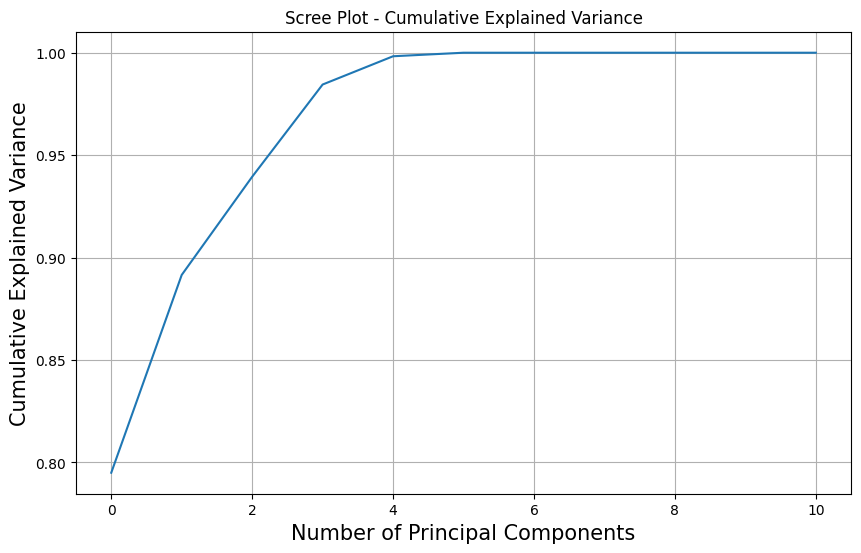

In [84]:
print(pca.explained_variance_ratio_)

# scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

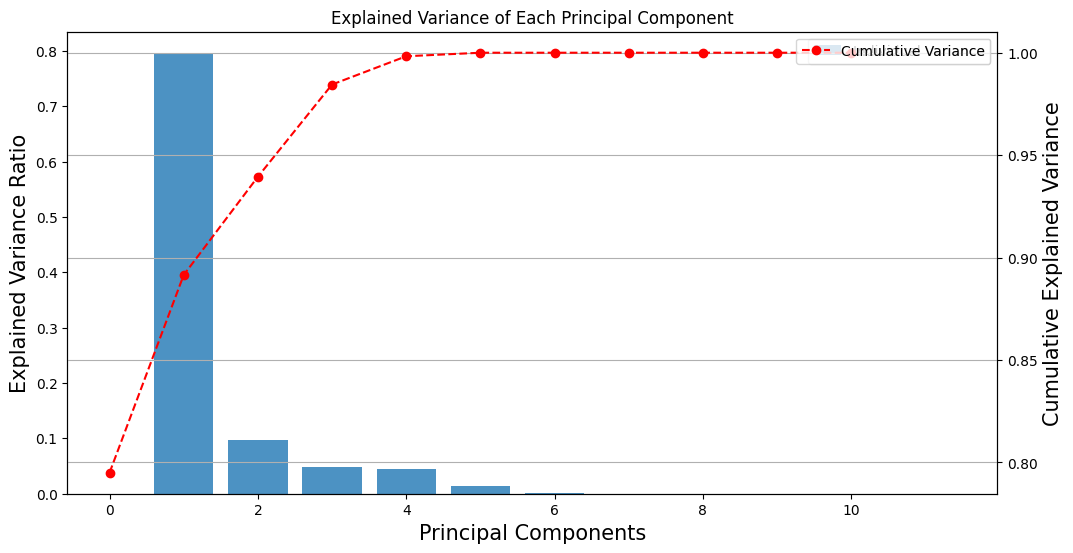

In [85]:
# Bar chart for individual explained variance
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.8, align='center', label='Individual Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Principal Component')
plt.legend()

# Line chart for cumulative explained variance
plt.twinx()
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='red', linestyle='--', marker='o', label='Cumulative Variance')
plt.ylabel('Cumulative Explained Variance')
plt.legend(loc='upper right')

plt.grid(True)
plt.show()

In [86]:
pca = PCA(0.95)

X_pca = pca.fit_transform(X)

X_pca.shape

(4269, 4)

In [87]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, shuffle=False)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
y_pred = rf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5655737704918032


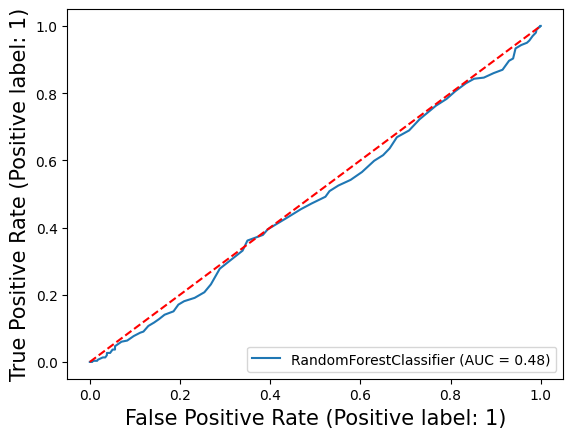

In [89]:
# ROC curve
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test_pca, y_test)
plt.plot([0,1], [0,1], 'r--')

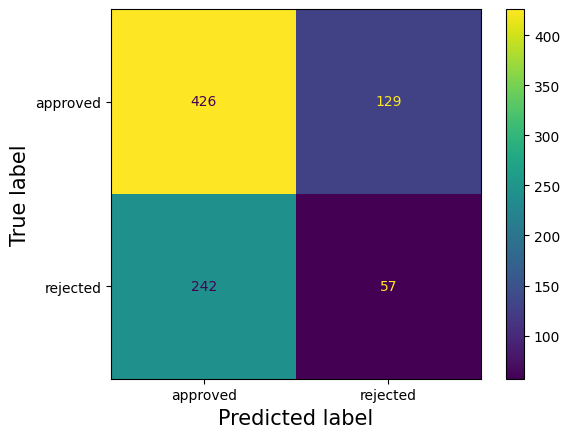

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['approved','rejected'])

cm_disp.plot()

In [91]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       555
           1       0.31      0.19      0.24       299

    accuracy                           0.57       854
   macro avg       0.47      0.48      0.47       854
weighted avg       0.52      0.57      0.54       854



In [92]:
# random classifier with all features 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9836065573770492


In [93]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# class 0 is approved class 1 is rejected 


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       555
           1       0.97      0.98      0.98       299

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [94]:
# Get feature importances
feature_importances = rf.feature_importances_

feature_importances

array([0.00804626, 0.00204096, 0.00259307, 0.01804022, 0.02831923,
       0.05693476, 0.81800552, 0.017202  , 0.01621925, 0.0180823 ,
       0.01451644])

{'no_of_dependents': 0.008046256360993438, 'education': 0.002040957087127877, 'self_employed': 0.0025930653328860714, 'income_annum': 0.0180402224340054, 'loan_amount': 0.028319225949161083, 'loan_term': 0.05693476067488465, 'cibil_score': 0.8180055219340508, 'residential_assets_value': 0.017202003262109293, 'commercial_assets_value': 0.01621925305972791, 'luxury_assets_value': 0.01808229523936501, 'bank_asset_value': 0.014516438665688415}


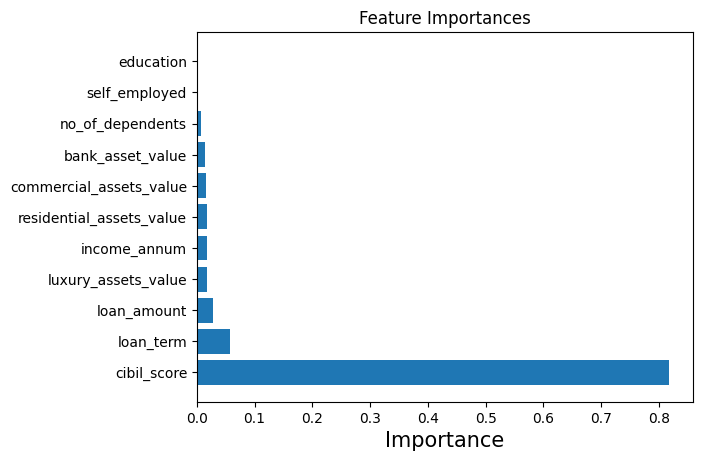

In [95]:
feature_names = [
    "no_of_dependents",
    "education",
    "self_employed",
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "residential_assets_value",
    "commercial_assets_value",
    "luxury_assets_value",
    "bank_asset_value"
]

feature_importances = rf.feature_importances_
feature_importance_dict = dict(zip(feature_names, feature_importances))
print(feature_importance_dict)

import matplotlib.pyplot as plt

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Plot feature importances
features, importance = zip(*sorted_feature_importances)
plt.barh(features, importance)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

AUC Score: 0.9835306878785139


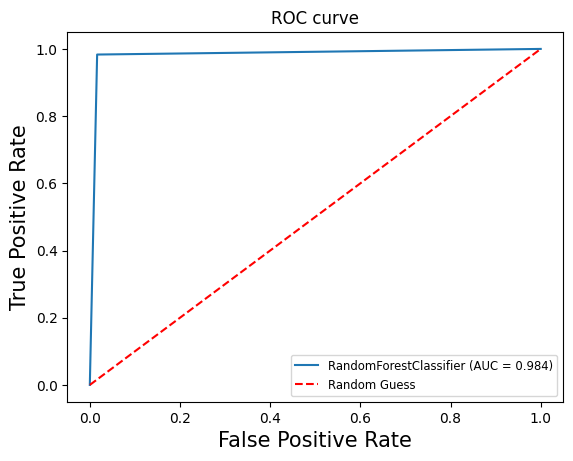

In [96]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Plot ROC curve with custom legend
plt.plot(fpr, tpr, label=f'RandomForestClassifier (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.legend(loc="lower right", fontsize='small')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

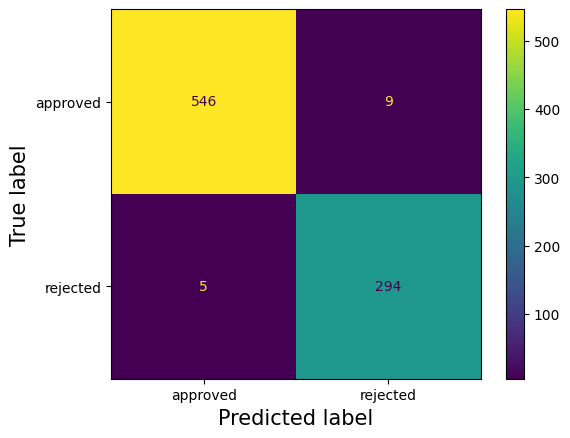

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['approved','rejected'])

cm_disp.plot()


In [98]:
# Assert the model isn't overfitting
from sklearn.model_selection import cross_val_score, KFold

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier()#random_state=42)

# Specify the number of folds (e.g., 5-fold cross-validation)
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True)#, random_state=42)

# Perform k-fold cross-validation
cross_val_results = cross_val_score(rf_classifier, X, y, cv=kf)

# Display the cross-validation results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {np.mean(cross_val_results)}')


Cross-Validation Results (Accuracy): [0.9765808  0.97892272 0.98477752 0.9882904  0.98124267]
Mean Accuracy: 0.9819628202981076


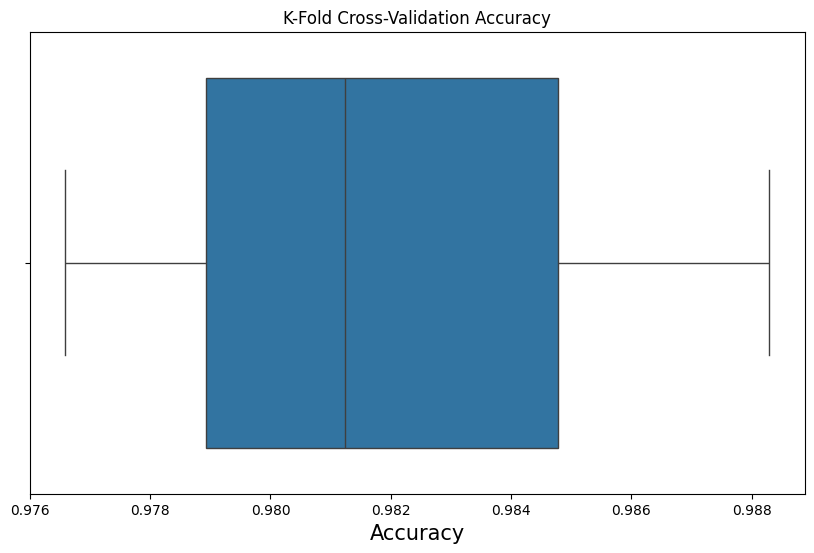

Mean Cross-Validation Accuracy: 0.98


In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=cross_val_results)
plt.title('K-Fold Cross-Validation Accuracy')
plt.xlabel('Accuracy')
plt.show()

# Optional: Display mean accuracy
mean_accuracy = cross_val_results.mean()
print(f'Mean Cross-Validation Accuracy: {mean_accuracy:.2f}')

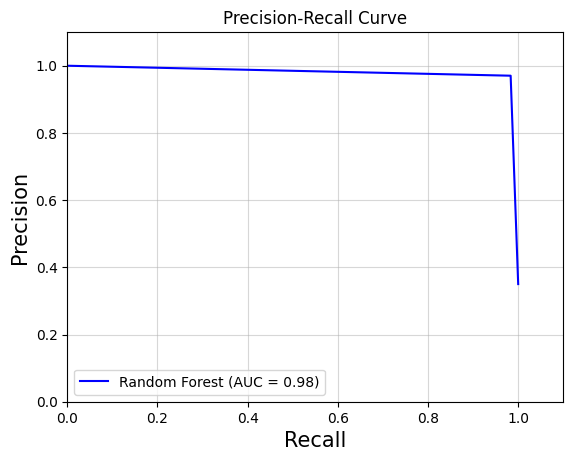

In [100]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_true=y_test, probas_pred=y_pred)

# Calculate AUC for precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, color='blue', linestyle='-', label='Random Forest (AUC = %0.2f)' % pr_auc)

plt.legend(loc='lower left')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

In [142]:
folds = 5
param_grid = {
    'max_depth': [3,8,1],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,1000, 150], 
    'max_features': range(1,10, 1)
}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1, return_train_score=True)

In [143]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, max_features=10,
                                              min_samples_leaf=100,
                                              min_samples_split=400),
             n_jobs=-1,
             param_grid={'max_depth': [3, 8, 1], 'max_features': range(1, 10),
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 1000, 150]},
             return_train_score=True, verbose=1)

In [144]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9663250366032212 using {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 300, 'min_samples_split': 200, 'n_estimators': 1000}


In [145]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=3,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=10, min_samples_leaf=100,
                       min_samples_split=400)

In [146]:
y_pred = rfc.predict(X_test)

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       555
           1       0.88      0.99      0.93       299

    accuracy                           0.95       854
   macro avg       0.94      0.96      0.95       854
weighted avg       0.96      0.95      0.95       854

